Итераций: 45
Минимум функции равен: 10.210215
Шаг: 0.500000
x1 : -4.175089e+00	x2 : 4.641306e-02	x3 : -8.655282e+00	

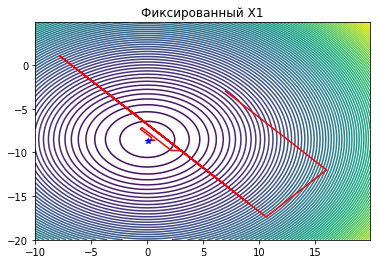

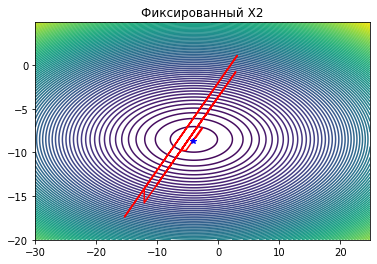

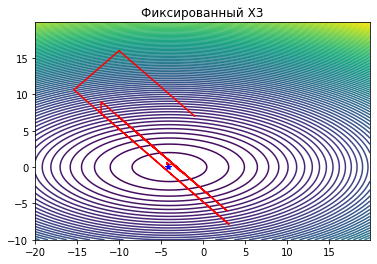

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x[0]**2 + 8*x[0] + 5*x[1]**2 + 7*x[2]**2 + 119.0*x[2] + 531.75
    
def g(x, p, a):
    return func([x[0]-p[0]*a, x[1]-p[1]*a, x[2]-p[2]*a])

# Алгоритм скользящего окна для унимодальности
# Находит глобальный минимум в [a,b]
def unimodality(x0, p, c, h):
    while True:
        c_left = c - h
        c_right = c + h
        f_left = g(x0, p, c_left)
        f_right = g(x0, p, c_right)
        f0 = g(x0, p, c)
        if f_left > f0 and f0 < f_right:
            a = c_left
            b = c_right
            #print('Функция в данной окне унимодальна')
            break
        else:
            if f_left > f_right:
                c += h/2
            else:
                c -= h/2
    return a , b

# Одномерная минимизация
# Метод квадратичной интерполяции
# Находит нашу альфу
def SquareInter(a, b, h, x, p):
    x1 = (a + b) / 2
    x2 = x1 + h
    if g(x, p, x1) > g(x, p, x2):
        x3 = x1 + 2*h
    else:
        x3 = x1 - h
    divisor = 2*((x2-x3)*g(x, p, x1)+(x3-x1)*g(x, p, x2)+(x1-x2)*g(x, p, x3))
    numerator = (x2**2-x3**2)*g(x, p, x1)+(x3**2-x1**2)*g(x, p, x2)+(x1**2-x2**2)*g(x, p, x3)
    if divisor == 0:
        print('error')
        return 3
    else:
        beta = numerator / divisor
    return beta

# Исследующий поиск
def exploratory_search(x0, h):
    xnew = x0[:]
    x_test = func(xnew)
    for i in range(len(xnew)):
        xh_plus = xnew[:]
        xh_minus = xnew[:]
        xh_plus[i] = xnew[i] + h
        xh_minus[i] = xnew[i] - h
        if func(xh_plus) < func(xnew):
            if func(xh_minus) < func(xnew):
                if func(xh_minus) < func(xh_plus):
                    xnew[i] = xh_minus[i]
                else:
                    xnew[i] = xh_plus[i]
            else:
                xnew[i] = xh_plus[i]
        if func(xh_minus) < func(xnew):
            xnew[i] = xh_minus[i]
        if xnew == xh_minus or xnew == xh_plus:
            continue
        else:
            xh_plus = xnew[:]
            xh_minus = xnew[:]
            h = h / 2
            i -= 1
    if func(xnew) == x_test:
        print('Неудачный поиск, поменяйте h')
    return xnew

# Вектор p в данном способе поиска минимума
def vec_p(xnew, x0):
    p = np.zeros(len(x0))
    for i in range(len(x0)):
        p[i] = xnew[i] - x0[i]
    return p

# Для корректной работы нужно подобрать подходящий шаг вручную
# для моей функции всё корректно работает при h = 0.5
dots_for_x0_x2=[]
dots_for_x1_x2=[]
dots_for_x0_x1=[]
h = 0.5
c = 0.001
x0 = [8, -2, 6]
eps = 0.001
i = 1
xnew = exploratory_search(x0, h)
p = vec_p(xnew, x0)
a , b = unimodality(xnew, p, c, h)
alpha = SquareInter(a, b, h, xnew, p)
x1 = x0 - alpha * p
graph_for_x0_x2 = [x1[0], x1[2]]
graph_for_x1_x2 = [x1[1], x1[2]]
graph_for_x0_x1 = [x1[0], x1[1]]
dots_for_x0_x2.append(graph_for_x0_x2)
dots_for_x1_x2.append(graph_for_x1_x2)
dots_for_x0_x1.append(graph_for_x0_x1)
while True:
    xnew = exploratory_search(x0, h)
    p = vec_p(xnew, x0)
    a , b = unimodality(xnew, p, c, h)
    alpha = SquareInter(a, b, h, xnew, p)
    x0 = [x1[0] , x1[1] , x1[2]]
    x1 = x0 - alpha * p
    i += 1
    graph_for_x0_x2 = [x1[0], x1[2]]
    graph_for_x1_x2 = [x1[1], x1[2]]
    graph_for_x0_x1 = [x1[0], x1[1]]
    dots_for_x0_x2.append(graph_for_x0_x2)
    dots_for_x1_x2.append(graph_for_x1_x2)
    dots_for_x0_x1.append(graph_for_x0_x1)
    if np.linalg.norm(x1-x0)/np.linalg.norm(x0) < eps:
        x_min = x1
        print('Итераций: %d' %i)
        print('Минимум функции равен: %f' %func(x1))
        print('Шаг: %f' %h)
        for i in range(3):
            print('x%d : %e' %(i+1,x1[i]), end = '\t')
        break


def f_for_plot_fixX0(x1,x2):
    x0 = x_min[0]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

def f_for_plot_fixX1(x0,x2):
    x1 = x_min[1]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

def f_for_plot_fixX2(x0,x1):
    x2 = x_min[2]
    return x0**2 + 8*x0 + 5*x1**2 + 7*x2**2 + 119.0*x2 + 531.75

xmin = x1[1]
ymin = x1[2]    
X,Y=np.array(dots_for_x1_x2).T
xlist,ylist=np.meshgrid(np.arange(-10,20,0.1),np.arange(-20,5,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX0(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X1')
plt.show()

xmin = x1[0]
ymin = x1[2]    
X,Y=np.array(dots_for_x0_x2).T
xlist,ylist=np.meshgrid(np.arange(-30,25,0.1),np.arange(-20,5,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX1(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X2')
plt.show()

xmin = x1[0]
ymin = x1[1]    
X,Y=np.array(dots_for_x0_x1).T
xlist,ylist=np.meshgrid(np.arange(-20,20,0.1),np.arange(-10,20,0.1))
plt.contour(xlist,ylist,f_for_plot_fixX2(xlist,ylist),100)
plt.plot(X,Y,'-r')
plt.plot(xmin,ymin,'b*')
plt.title('Фиксированный X3')
plt.show()

